In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import style
import seaborn as sns
import pyproj
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

In [3]:
# Lee el archivo CSV en un DataFrame
data = pd.read_csv('/content/dataframe_completo.csv')

# Obtiene un listado de todas las columnas
columnas = data.columns

# Imprime las columnas
print("Listado de todas las columnas:")
for columna in columnas:
    print(columna)

Listado de todas las columnas:
Year
Quarter
Provincia
Partido
Localidad
Poblacion_2022
Acc_cada_100_hog
Acc_cada_100_hab
ADSL_2022
Cablemodem_2022
Dial Up_2022
Fibra optica_2022
Satelital_2022
Wireless_2022
Telefonia Fija_2022
3G_2022
4G_2022
Cant_ADSL_2022
Cant_Cablemodem_2022
Cant_DialUp_2022
Cant_FibraOptica_2022
Cant_Otros_2022
Cant_Satelital_2022
Cant_Wimax_2022
Cant_Wireless_2022
Total_2022
Pob_prov_2022
Salario_promedio
Latitud
Longitud


In [4]:
# Crear un objeto de proyección Mercator
wgs84 = pyproj.Proj(init="epsg:4326")  # Coordenadas geográficas (latitud y longitud)
web_mercator = pyproj.Proj(init="epsg:3857")  # Coordenadas Mercator

# Supongamos que tienes un DataFrame llamado 'data' con las columnas 'Latitud' y 'Longitud'
latitudes = data['Latitud'].tolist()
longitudes = data['Longitud'].tolist()

# Convertir latitud y longitud a x e y
x, y = pyproj.transform(wgs84, web_mercator, longitudes, latitudes)

# Ahora, los valores de x e y contienen las coordenadas en el sistema "x" e "y"
# Puedes agregarlos de nuevo al DataFrame si lo deseas
data['X'] = x
data['Y'] = y


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-4-6b4c1342c49f>:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = pyproj.transform(wgs84, web_mercator, longit

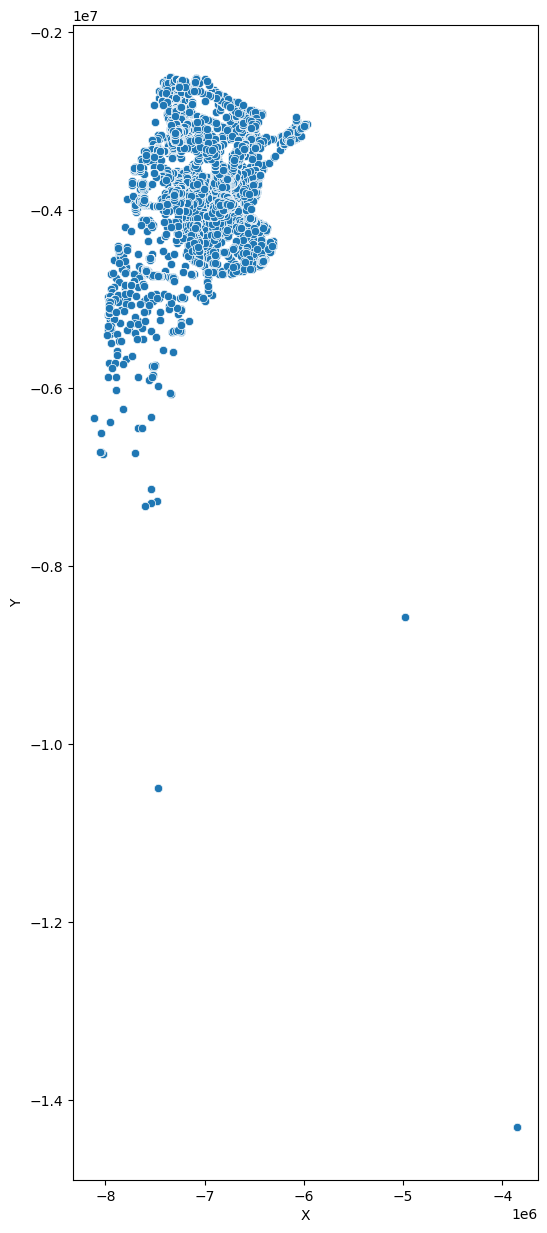

In [5]:
plt.figure(figsize=(6, 15))
sns.scatterplot(x=data['X'], y=data['Y'])
plt.show()

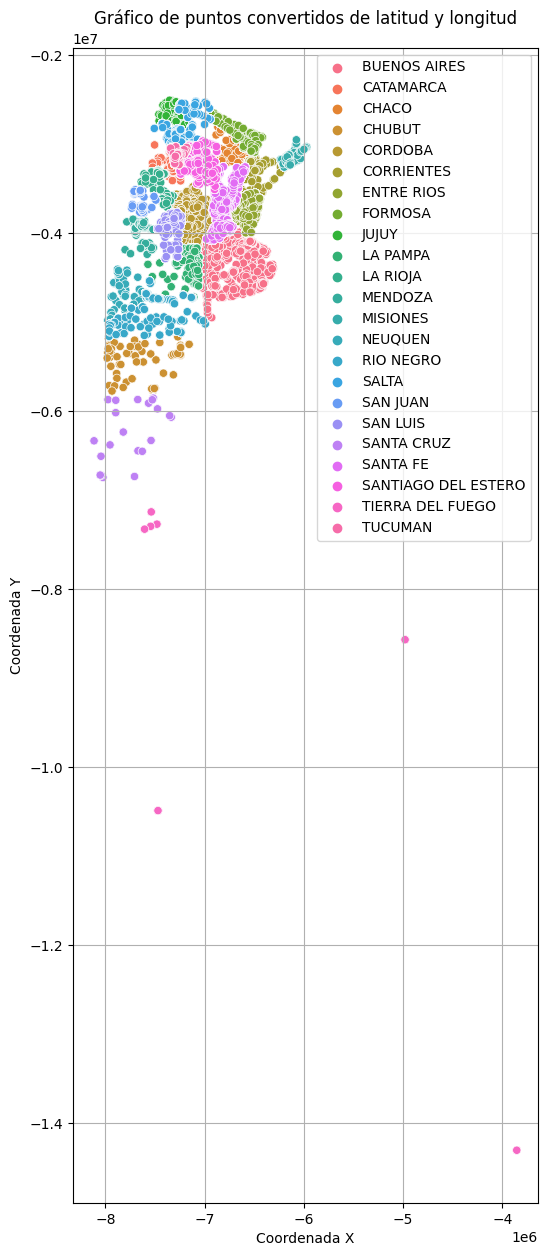

In [6]:
# Graficar los puntos en un gráfico 2D
plt.figure(figsize=(6, 15))  # Cambia estos valores según tus necesidades
sns.scatterplot(data=data, x=data['X'], y=data['Y'], hue='Provincia', color='b') #agrupados por provincia
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de puntos convertidos de latitud y longitud')
plt.legend()
plt.grid(True)
plt.show()

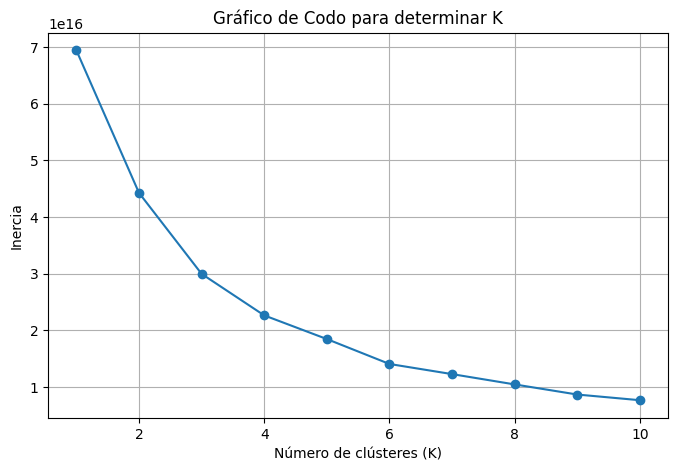

In [8]:
# Crear una lista para almacenar los valores de inercia
inertia = []

# Prueba diferentes valores de K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k ,init="k-means++" , n_init='auto')
    kmeans.fit(data[['X', 'Y']])
    inertia.append(kmeans.inertia_)

# Graficar el gráfico de codo
plt.figure(figsize=(8, 5))  # Ajusta el tamaño según tus necesidades
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Inercia')
plt.title('Gráfico de Codo para determinar K')
plt.grid(True)
plt.show()

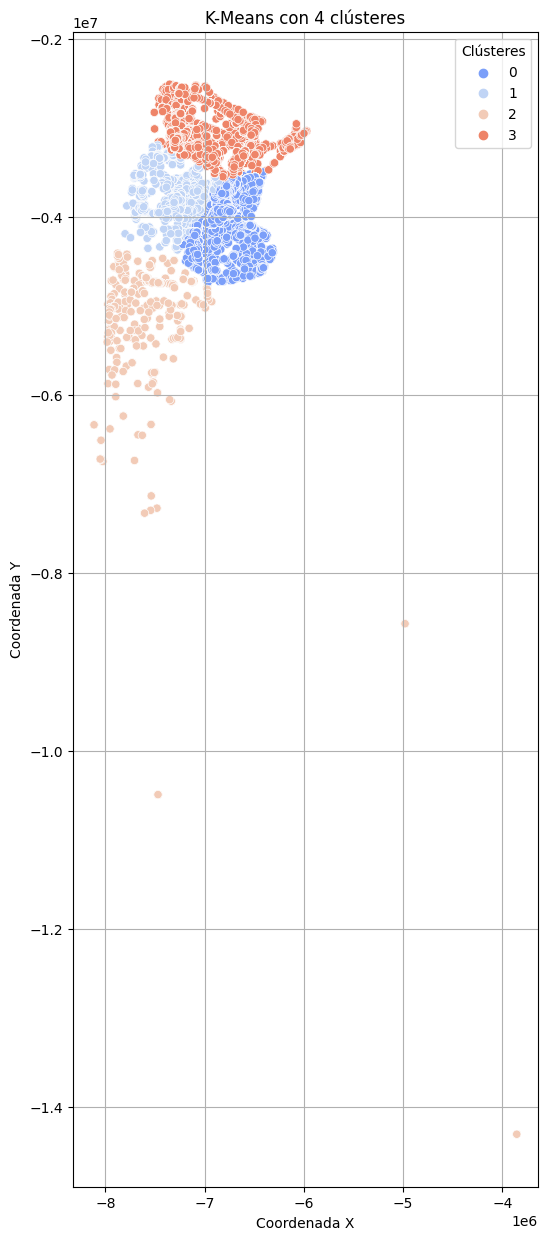

In [9]:
# Especificar el número de clústeres K
k = 4  # Cambia este valor de K
# Crear un objeto K-Means
kmeans = kmeans = KMeans(n_clusters=k ,init="k-means++" , n_init='auto')

# Ajustar K-Means a tus datos
data['cluster'] = kmeans.fit_predict(data[['X', 'Y']])

# Graficar los puntos coloreados por clúster
plt.figure(figsize=(6, 15))
custom_palette = sns.color_palette("coolwarm", n_colors=k)
scatter = sns.scatterplot(data=data, x=data['X'], y=data['Y'], hue='cluster', palette=custom_palette)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title(f'K-Means con {k} clústeres')
# Crear una leyenda
handles, labels = scatter.get_legend_handles_labels()
legend = plt.legend(handles, labels, title='Clústeres', loc='upper right')
plt.grid(True)
plt.show()

In [10]:
# Calcular la cantidad de puntos en cada clúster
cluster_counts = data['cluster'].value_counts().sort_index()

# Imprimir el conteo de cada clúster junto con el porcentaje
total_puntos = len(data)  # Obtén el total de puntos
for label, count in cluster_counts.items():
    porcentaje = (count / total_puntos) * 100  # Calcula el porcentaje
    print(f'Clúster {label}: {count} puntos - Porcentaje: {porcentaje:.2f}%')

Clúster 0: 41184 puntos - Porcentaje: 38.47%
Clúster 1: 28332 puntos - Porcentaje: 26.46%
Clúster 2: 9972 puntos - Porcentaje: 9.31%
Clúster 3: 27576 puntos - Porcentaje: 25.76%
